## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель проекта
Необходимо научиться определять рыночную стоимость недвижимости в г. Санкт-Петербург и соседних населеных пунктах. Для этого нужно выяснить от каких параметров зависит стоимость недвижимости. 

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

<div style="font-size: 20px"><b>Откроем датасет и изучим общую информацию о данных</b></div> <br>
Некоторые проблемы можно увидеть и обычным просмотром датасета через Excel, но воспользуемся некоторыми методами Pandas.

In [ ]:
# <объявление библиотек>
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [ ]:
# <приведем формат к читабельному виду>
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# <посмотрим числовое описание данных для каждой колонки таблицы>
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [ ]:
# <посмотрим общую информацию о датасете>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [ ]:
# <посмотрим количество пропусков в датасете>
print(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [ ]:
df.isnull().sum()*100 / len(df)

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

In [ ]:
# <посмотрим количество дубликатов в датасете>
print(df.duplicated().sum())

0


In [ ]:
# <посмотрим количество каких квартир(по количеству комнат) преобладает в датасете>
print(df['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


In [ ]:
# <посмортим количество квартир - студий>
print(df['studio'].value_counts())

False    23550
True       149
Name: studio, dtype: int64


In [ ]:
# <посмортим количество квартир, где свободная планировка>
print(df['open_plan'].value_counts())

False    23632
True        67
Name: open_plan, dtype: int64


In [ ]:
# <посмортим количество квартир-апартаментов>
print(df['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


In [ ]:
# <посмортим количество домов по числу этажей>
print(df['floors_total'].value_counts())

5.00     5788
9.00     3761
16.00    1376
12.00    1362
4.00     1200
10.00    1174
25.00    1075
6.00      914
17.00     833
3.00      668
7.00      592
14.00     553
18.00     505
24.00     469
8.00      390
2.00      383
15.00     365
23.00     352
19.00     339
22.00     286
20.00     271
13.00     229
11.00     203
27.00     164
21.00     158
26.00     124
1.00       25
35.00      24
28.00      21
36.00       3
29.00       1
60.00       1
33.00       1
52.00       1
37.00       1
34.00       1
Name: floors_total, dtype: int64


In [ ]:
# <посмотрим нет ли совпадающих названий, которые написаны по-разному>
print(df['locality_name'].value_counts())

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
деревня Хапо-Ое                1
село Никольское                1
поселок Ромашки                1
деревня Русско                 1
деревня Малая Романовка        1
Name: locality_name, Length: 364, dtype: int64


In [ ]:
df['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

### Вывод

На данном этапе выявленны следующие проблемы, которые необходимо решить:
1. В некоторых столбцах встречаются очень много пропусков;
2. Необходимо привести данные, в неторых столбцах, к нужным типам;
3. Привести названия столбцов к подходящему названию и к одному регистру, выделяются столбцы: <i><b>'balcony'</b></i>, <i><b>'cityCenters_nearest'</b></i>, <i><b>'parks_around3000'</b></i> и <i><b>'ponds_around3000'</b></i>;
4. Не совсем понятен столбец <i><b>'is_apartment'</b></i>, где-то просто пустое значение, а где-то False;
5. В столбце <i><b>'rooms'</b></i> содержится большое количетсво квартир, у которых указано <i><b>0</b></i> комнат.
6. Пропущены значения в столбце <i><b>'locality_name'</b></i>, вряд ли кто-то осуществляет покупку квартиры, не зная где она находится. Также там идет совпадение названий, например, 'посёлок Бугры','поселок Бугры', 'Мурино', 'поселок Мурино'. 

## Шаг 2. Предобработка данных

In [ ]:
# <приведем названия некоторых столбцов к понятному названию и к одному регистру методом rename()>
df = df.rename(columns = {'balcony': 'number_balconies',
                          'cityCenters_nearest': 'city_center_nearest', 
                          'parks_around3000': 'number_parks_around_3km', 
                          'ponds_around3000': 'number_ponds_around_3km'})

In [ ]:
# <проверка>
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,number_balconies,locality_name,airports_nearest,city_center_nearest,number_parks_around_3km,parks_nearest,number_ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,nan,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,nan
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,...,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,...,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,...,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00


### Обработка пропусков

In [ ]:
# <удаляем пропущенные значения в столбце 'locality_name'>
df = df.dropna(subset = ['locality_name'])

In [ ]:
# <проверка>
df['locality_name'].isna().sum()

0

In [ ]:
# <количество названий 'locality_name'>
print(len(df['locality_name'].value_counts()))

364


In [ ]:
# <заменяем 'ё' на 'е' в 'locality_name'>
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('деревня Кудрово', 'Кудрово', regex=True)
df['locality_name'] = df['locality_name'].str.replace('поселок Мурино', 'Мурино', regex=True)

In [ ]:
print(len(df['locality_name'].value_counts()))

328


In [ ]:
# <замена пустых значений на 0 в столбце 'number_balconies'>
df['number_balconies'] = df['number_balconies'].fillna(0)

In [ ]:
# <проверка>
df['number_balconies'].isna().sum()

0

In [ ]:
# <замена пустых значений на 0 в столбце 'number_parks_around_3km'>
df['number_parks_around_3km'] = df['number_parks_around_3km'].fillna(0)

In [ ]:
# <замена пустых значений на 0 в столбце 'number_ponds_around_3km'>
df['number_ponds_around_3km'] = df['number_ponds_around_3km'].fillna(0)

In [ ]:
# <заменим пропуски в столбце 'floors_total' на медиану по каждому названию населенного пункта>
df['floors_total'] = df.groupby('locality_name')['floors_total'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# <в столбце 'is_apartment' NaN заменим на False, так как в основном объекты жилового фонда>
df['is_apartment'] = df['is_apartment'].fillna(0)

In [ ]:
df.loc[df['last_price'] == 12190.00, 'last_price'] = 1219000.00

In [ ]:
df.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height              9160
floors_total                   0
living_area                 1898
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                2269
number_balconies               0
locality_name                  0
airports_nearest            5534
city_center_nearest         5511
number_parks_around_3km        0
parks_nearest              15586
number_ponds_around_3km        0
ponds_nearest              14565
days_exposition             3180
dtype: int64

### Вывод
1. Заменили пропуски на <b>0</b> в трех столбцах, так как в случаях с числом балконов, парков и водоемов(в пределах 3 км) может не быть вовсе. Возможно пропуски появились из-за того, что пользователь не заполнил полностью информацию, либо не знает ее(о парках или водоемах). Также есть вероятность, что человек соединил балкон с какой-либо комнатой и забыл, что это был когда-то балкон. 
2. Отсутсвие значений в таких столбцах как <b><i>'locality_name'</i></b>, <b><i>'airports_nearest'</i></b>, <b><i>'city_center_nearest'</i></b>, <b><i>'parks_nearest'</i></b>, <b><i>'ponds_nearest'</i></b>, возможно, обусловленно тем, что система не смогла рассчитать автоматически данные расстояния. Произойти это может из-за того, что пользователь не указал координаты, геолокацию расположения квартиры.
3. Отсутсвие значений в столбце <b><i>'days_exposition'</i></b>, возможно, обусловленно тем, что объявление до сих пор размещено.
4. Так же встречаются пустые значения в столбцах <b><i>'ceiling_height'</i></b>, <b><i>'floors_total'</i></b>, <b><i>'is_apartment'</i></b>. Данные показатели также скорее всего не стремятся заполнять пользователи, так как они одни из самых основных. Мало кто захочет, к примеру, квартиру с потолками 2.40. Жить в доме, где 25 этажей(где очень много квартир и жильцов). Или покупать квартиру в апартаментах, так как, мало кто знает, что квартплата там на порядок выше, чем в обычных квартирах.

### Приведение данных к нужным типам

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images               23650 non-null int64
last_price                 23650 non-null float64
total_area                 23650 non-null float64
first_day_exposition       23650 non-null object
rooms                      23650 non-null int64
ceiling_height             14490 non-null float64
floors_total               23650 non-null float64
living_area                21752 non-null float64
floor                      23650 non-null int64
is_apartment               23650 non-null object
studio                     23650 non-null bool
open_plan                  23650 non-null bool
kitchen_area               21381 non-null float64
number_balconies           23650 non-null float64
locality_name              23650 non-null object
airports_nearest           18116 non-null float64
city_center_nearest        18139 non-null float64
number_parks_around_3km    23650 non-null float64
parks_

In [ ]:
#<приводим столбец 'is_apartment' к типу bool>
df['is_apartment'] = df['is_apartment'].astype('bool')

In [ ]:
#<приводим столбец 'number_balconies' к типу int>
df['number_balconies'] = df['number_balconies'].astype('int')

In [ ]:
#<приводим столбец 'floors_total' к типу int>
df['floors_total'] = df['floors_total'].astype('int')

In [ ]:
#<приводим столбец 'number_parks_around_3km' к типу int>
df['number_parks_around_3km'] = df['number_parks_around_3km'].astype('int')

In [ ]:
#<приводим столбец 'number_ponds_around_3km' к типу int>
df['number_ponds_around_3km'] = df['number_ponds_around_3km'].astype('int')

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = "%Y-%m-%dT%H:%M:%S")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images               23650 non-null int64
last_price                 23650 non-null float64
total_area                 23650 non-null float64
first_day_exposition       23650 non-null datetime64[ns]
rooms                      23650 non-null int64
ceiling_height             14490 non-null float64
floors_total               23650 non-null int64
living_area                21752 non-null float64
floor                      23650 non-null int64
is_apartment               23650 non-null bool
studio                     23650 non-null bool
open_plan                  23650 non-null bool
kitchen_area               21381 non-null float64
number_balconies           23650 non-null int64
locality_name              23650 non-null object
airports_nearest           18116 non-null float64
city_center_nearest        18139 non-null float64
number_parks_around_3km    23650 non-null int64
parks_

### Вывод
1. Необходимо было заменить на тип <b>int</b> в столбцах <i><b>'number_balconies'</b></i>, <i><b>'floors_total'</b></i>, <i><b>'number_parks_around_3km'</b></i>, <i><b>'number_ponds_around_3km'</b></i>, так как там не может быть нецелочисленных значений.
2. Столбец <i><b>'is_apartment'</b></i> приводим к типу <b>bool</b>, так как либо это аппартаменты, либо нет. 
3. Столбец <i><b>'first_day_exposition'</b></i> привели к нужному типу <b>datetime</b>, так как дата была строкой.

## Шаг 3. Посчитайте и добавьте в таблицу

In [ ]:
# <рассчитаем цену квадратного метра>
df['price_per_meter'] = df['last_price'] / df['total_area']
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,number_balconies,locality_name,airports_nearest,city_center_nearest,number_parks_around_3km,parks_nearest,number_ponds_around_3km,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2,755.00,nan,120370.37
1,7,3350000.00,40.40,2018-12-04,1,nan,11,18.60,1,False,...,2,поселок Шушары,12817.00,18603.00,0,nan,0,nan,81.00,82920.79
2,10,5196000.00,56.00,2015-08-20,2,nan,5,34.30,4,False,...,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2,574.00,558.00,92785.71
3,0,64900000.00,159.00,2015-07-24,3,nan,14,nan,9,False,...,0,Санкт-Петербург,28098.00,6800.00,2,84.00,3,234.00,424.00,408176.10
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121.00,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,0,Санкт-Петербург,24665.00,4232.00,1,796.00,3,381.00,nan,72490.85
23695,14,3100000.00,59.00,2018-01-15,3,nan,5,38.00,4,False,...,0,Тосно,nan,nan,0,nan,0,nan,45.00,52542.37
23696,18,2500000.00,56.70,2018-02-11,2,nan,3,29.70,1,False,...,0,село Рождествено,nan,nan,0,nan,0,nan,nan,44091.71
23697,13,11475000.00,76.75,2017-03-28,2,3.00,17,nan,12,False,...,2,Санкт-Петербург,39140.00,10364.00,2,173.00,3,196.00,602.00,149511.40


In [ ]:
# <выведем в столбцы день недели, месяц, год публикации>
df["weekday_public"] = df['first_day_exposition'].dt.day_name() 
df["month_public"] = df['first_day_exposition'].dt.month_name()
df["year_public"] = df['first_day_exposition'].dt.year
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_center_nearest,number_parks_around_3km,parks_nearest,number_ponds_around_3km,ponds_nearest,days_exposition,price_per_meter,weekday_public,month_public,year_public
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.00,1,482.00,2,755.00,nan,120370.37,Thursday,March,2019
1,7,3350000.00,40.40,2018-12-04,1,nan,11,18.60,1,False,...,18603.00,0,nan,0,nan,81.00,82920.79,Tuesday,December,2018
2,10,5196000.00,56.00,2015-08-20,2,nan,5,34.30,4,False,...,13933.00,1,90.00,2,574.00,558.00,92785.71,Thursday,August,2015
3,0,64900000.00,159.00,2015-07-24,3,nan,14,nan,9,False,...,6800.00,2,84.00,3,234.00,424.00,408176.10,Friday,July,2015
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098.00,2,112.00,1,48.00,121.00,100000.00,Tuesday,June,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,4232.00,1,796.00,3,381.00,nan,72490.85,Tuesday,March,2017
23695,14,3100000.00,59.00,2018-01-15,3,nan,5,38.00,4,False,...,nan,0,nan,0,nan,45.00,52542.37,Monday,January,2018
23696,18,2500000.00,56.70,2018-02-11,2,nan,3,29.70,1,False,...,nan,0,nan,0,nan,nan,44091.71,Sunday,February,2018
23697,13,11475000.00,76.75,2017-03-28,2,3.00,17,nan,12,False,...,10364.00,2,173.00,3,196.00,602.00,149511.40,Tuesday,March,2017


In [ ]:
# <создадим функцию, чтобы назвать этаж квартиры>
def define_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'   

In [ ]:
# <создадим столбец>
df['define_floor'] = df.apply(define_floor, axis=1)
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,number_parks_around_3km,parks_nearest,number_ponds_around_3km,ponds_nearest,days_exposition,price_per_meter,weekday_public,month_public,year_public,define_floor
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.00,2,755.00,nan,120370.37,Thursday,March,2019,другой
1,7,3350000.00,40.40,2018-12-04,1,nan,11,18.60,1,False,...,0,nan,0,nan,81.00,82920.79,Tuesday,December,2018,первый
2,10,5196000.00,56.00,2015-08-20,2,nan,5,34.30,4,False,...,1,90.00,2,574.00,558.00,92785.71,Thursday,August,2015,другой
3,0,64900000.00,159.00,2015-07-24,3,nan,14,nan,9,False,...,2,84.00,3,234.00,424.00,408176.10,Friday,July,2015,другой
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2,112.00,1,48.00,121.00,100000.00,Tuesday,June,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,1,796.00,3,381.00,nan,72490.85,Tuesday,March,2017,другой
23695,14,3100000.00,59.00,2018-01-15,3,nan,5,38.00,4,False,...,0,nan,0,nan,45.00,52542.37,Monday,January,2018,другой
23696,18,2500000.00,56.70,2018-02-11,2,nan,3,29.70,1,False,...,0,nan,0,nan,nan,44091.71,Sunday,February,2018,первый
23697,13,11475000.00,76.75,2017-03-28,2,3.00,17,nan,12,False,...,2,173.00,3,196.00,602.00,149511.40,Tuesday,March,2017,другой


In [ ]:
# <найдем соотношение жилой и общей площади>
df['living_ratio_total'] = df['living_area'] / df['total_area']

In [ ]:
# <найдем соотношение площади кухни и общей площади>
df['kitchen_ratio_total'] = df['kitchen_area'] / df['total_area']
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,number_ponds_around_3km,ponds_nearest,days_exposition,price_per_meter,weekday_public,month_public,year_public,define_floor,living_ratio_total,kitchen_ratio_total
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.00,nan,120370.37,Thursday,March,2019,другой,0.47,0.23
1,7,3350000.00,40.40,2018-12-04,1,nan,11,18.60,1,False,...,0,nan,81.00,82920.79,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2,nan,5,34.30,4,False,...,2,574.00,558.00,92785.71,Thursday,August,2015,другой,0.61,0.15
3,0,64900000.00,159.00,2015-07-24,3,nan,14,nan,9,False,...,3,234.00,424.00,408176.10,Friday,July,2015,другой,nan,nan
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.00,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381.00,nan,72490.85,Tuesday,March,2017,другой,0.55,0.10
23695,14,3100000.00,59.00,2018-01-15,3,nan,5,38.00,4,False,...,0,nan,45.00,52542.37,Monday,January,2018,другой,0.64,0.14
23696,18,2500000.00,56.70,2018-02-11,2,nan,3,29.70,1,False,...,0,nan,nan,44091.71,Sunday,February,2018,первый,0.52,nan
23697,13,11475000.00,76.75,2017-03-28,2,3.00,17,nan,12,False,...,3,196.00,602.00,149511.40,Tuesday,March,2017,другой,nan,0.30


### Вывод
Выполнили требования данного пункта. Посчитали необходимые параметры и добавили в таблицу.

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<ul style="border:solid black 2px; padding: 20px">
    <li>Изучим следующие параметры: площадь, цену, число комнат, высоту потолков. Построим гистограмму для каждого параметра.</li>
</ul>  

In [ ]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.00,23650.00,23650.00,14490.00
mean,60.33,6541177.93,2.07,2.77
std,35.66,10896371.42,1.08,1.26
min,12.00,430000.00,0.00,1.00
25%,40.00,3400000.00,1.00,2.52
50%,52.00,4650000.00,2.00,2.65
75%,69.70,6799000.00,3.00,2.80
max,900.00,763000000.00,19.00,100.00


1. Подозрительное максимальное значние площади квартиры.
2. Нереальные минимальные и максимальные значения потолков.
3. В квартире 19 комнат!?

### Изучим площадь квартир

In [ ]:
df['total_area'].value_counts()

45.00    419
42.00    383
60.00    346
31.00    346
44.00    343
        ... 
54.75      1
45.85      1
44.18      1
59.83      1
23.55      1
Name: total_area, Length: 2181, dtype: int64

In [ ]:
# <рассчитаем медиану>
df['total_area'].median()

52.0

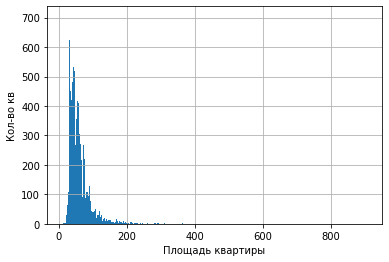

In [ ]:
df['total_area'].plot(kind = 'hist',bins = 1000, range = (10, 905), grid =True)
plt.xlabel('Площадь квартиры')
plt.ylabel('Кол-во кв')
plt.show()

1. <b>Наблюдаем,что гистограмма с длинным хвостом на высоких значениях(возможно немало выбросов), которые влияют на среднее. Встречаются падения в ноль слева от пика, не доходя до нулевого значения.
2. Заметим, что медиана и среднее близки.
3. Узнаем характерный разброс, построим диаграмму размаха.</b> 

(0, 900)

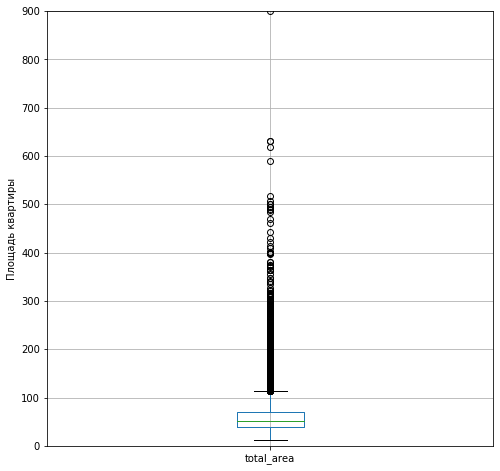

In [ ]:
df.boxplot(['total_area'], figsize = (8,8))
plt.ylabel('Площадь квартиры')
plt.ylim(0, 900)

<b>Заметим, что большая часть лежит до 120. Выбросов очень много.</b>

In [ ]:
# <coздадим функцию, которая будет осуществлять срезы, чтобы избавиться от выбросов>
def section_query(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    section = data[(data[column] >= (q1 - 1.5 * iqr)) & (data[column] <= (q3 + 1.5 * iqr))]
    return section                 

In [ ]:
section_area = section_query(df, 'total_area')
print(section_area['total_area'].describe())

count   22406.00
mean       54.33
std        19.35
min        12.00
25%        39.40
50%        50.10
75%        65.50
max       114.20
Name: total_area, dtype: float64


In [ ]:
print(section_area['total_area'].value_counts())

45.00    419
42.00    383
60.00    346
31.00    346
44.00    343
        ... 
48.03      1
20.10      1
60.16      1
73.72      1
23.55      1
Name: total_area, Length: 1644, dtype: int64


In [ ]:
print(section_area['total_area'].median())

50.1


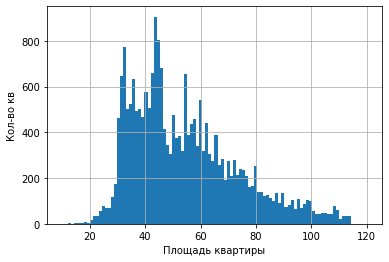

In [ ]:
section_area['total_area'].plot(kind = 'hist',bins = 100, range = (10, 120), grid =True)
plt.xlabel('Площадь квартиры')
plt.ylabel('Кол-во кв')
plt.show()

<b>Заметим, что пик наблюдается примерно на 45, потом спад около 50 и снова подьем.</b>

(0, 150)

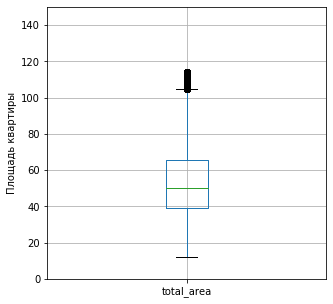

In [ ]:
section_area.boxplot(['total_area'], figsize = (5,5))
plt.ylabel('Площадь квартиры')
plt.ylim(0, 150)

### Изучим цену квартир

In [ ]:
df['last_price'].value_counts()

4500000.00    342
3500000.00    289
4000000.00    260
4300000.00    260
4200000.00    258
             ... 
7725000.00      1
2660000.00      1
6712399.00      1
6338000.00      1
6029433.00      1
Name: last_price, Length: 2964, dtype: int64

In [ ]:
# <рассчитаем медиану>
df['last_price'].median()

4650000.0

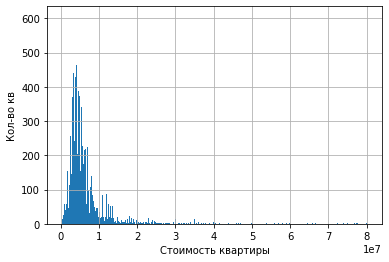

In [ ]:
df['last_price'].plot(kind = 'hist',bins = 1000, range = (420000, 80000000), grid =True)
plt.xlabel('Стоимость квартиры')
plt.ylabel('Кол-во кв')
plt.show()

1. <b>Наблюдаем,что гистограмма с длинным хвостом на высоких значениях(возможно немало выбросов), которые влияют на среднее. Встречаются падения в ноль, не доходя до нулевого значения.
2. Узнаем характерный разброс, построим диаграмму размаха.</b> 

(-10000000, 100000000)

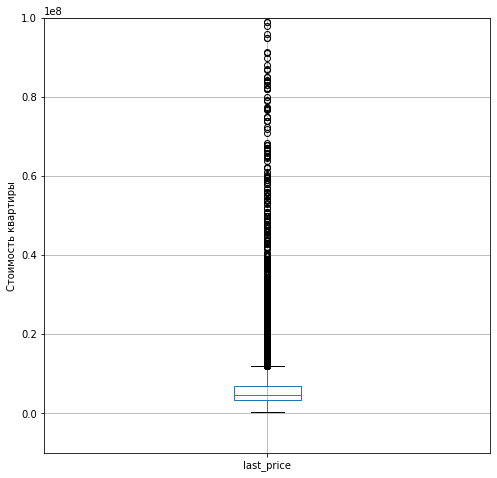

In [ ]:
# <сложно сделать выводы по данным графикам, кроме того,что очень много выбросов>
df.boxplot(['last_price'], figsize = (8,8))
plt.ylabel('Стоимость квартиры')
plt.ylim(-10000000, 100000000)

In [ ]:
# <применим функцию, для цены на квартиры>
section_price = section_query(df, 'last_price')
print(section_price['last_price'].describe())

count      21595.00
mean     4838997.97
std      2217175.77
min       430000.00
25%      3300000.00
50%      4400000.00
75%      6000000.00
max     11894400.00
Name: last_price, dtype: float64


In [ ]:
print(section_price['last_price'].value_counts())

4500000.00     342
3500000.00     289
4000000.00     260
4300000.00     260
4200000.00     258
              ... 
11748225.00      1
9828000.00       1
8603000.00       1
2695000.00       1
6029433.00       1
Name: last_price, Length: 2209, dtype: int64


In [ ]:
print(section_price['last_price'].median())

4400000.0


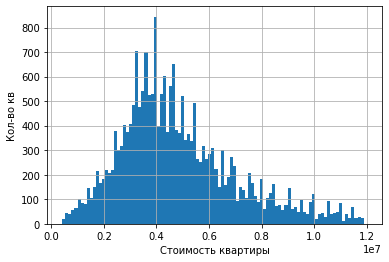

In [ ]:
section_price['last_price'].plot(kind = 'hist',bins = 100, range = (420000, 12000000), grid =True)
plt.xlabel('Стоимость квартиры')
plt.ylabel('Кол-во кв')
plt.show()

(-120000, 13000000)

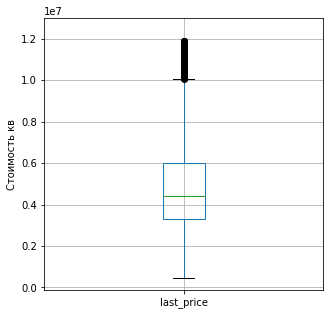

In [ ]:
section_price.boxplot(['last_price'], figsize = (5,5))
plt.ylabel('Стоимость кв')
plt.ylim(-120000, 13000000)

### Изучим число комнат

In [ ]:
df['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [ ]:
print(df['rooms'].median())

2.0


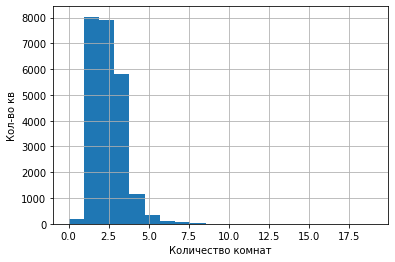

In [ ]:
df['rooms'].plot(kind = 'hist',bins =20, range = (0,19), grid =True)
plt.xlabel('Количество комнат')
plt.ylabel('Кол-во кв')
plt.show()

<b>Заметим, что большее число 1-комнатных и 2-комнатных. Построим диаграмму размаха, чтобы посмотреть выбросы.</b>

(-5, 20)

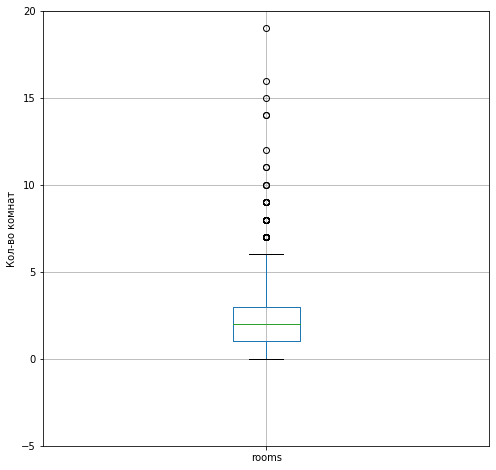

In [ ]:
df.boxplot(['rooms'], figsize = (8,8))
plt.ylabel('Кол-во комнат')
plt.ylim(-5, 20)

In [ ]:
# <применим функцию, на комнаты>
section_rooms = section_query(df, 'rooms')
print(section_rooms['rooms'].describe())

count   23560.00
mean        2.05
std         1.01
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         6.00
Name: rooms, dtype: float64


In [ ]:
print(section_rooms['rooms'].value_counts())

1    8036
2    7924
3    5797
4    1175
5     326
0     197
6     105
Name: rooms, dtype: int64


In [ ]:
print(section_rooms['rooms'].median())

2.0


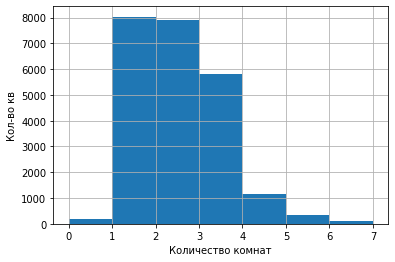

In [ ]:
section_rooms['rooms'].plot(kind = 'hist',bins =7, range = (0, 7), grid =True)
plt.xlabel('Количество комнат')
plt.ylabel('Кол-во кв')
plt.show()

(-2, 8)

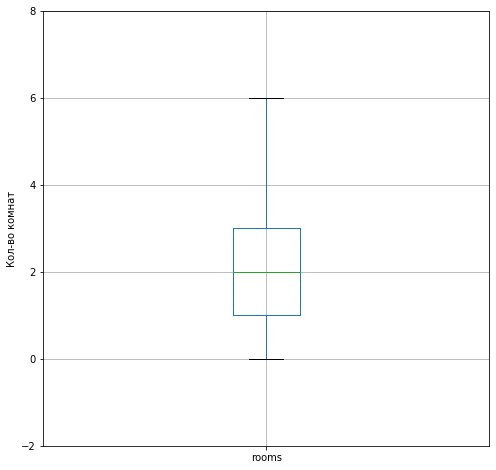

In [ ]:
section_rooms.boxplot(['rooms'], figsize = (8,8))
plt.ylabel('Кол-во комнат')
plt.ylim(-2, 8)

### Изучим высоту потолков

In [ ]:
print(df['ceiling_height'].value_counts())

2.50      3515
2.60      1645
2.70      1572
3.00      1109
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64


In [ ]:
print(df['ceiling_height'].median())

2.65


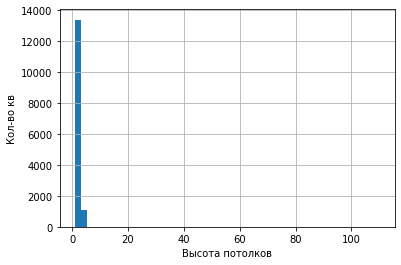

In [ ]:
df['ceiling_height'].plot(kind = 'hist',bins = 50, range = (1, 110), grid =True)
plt.xlabel('Высота потолков')
plt.ylabel('Кол-во кв')
plt.show()

<b>Сложно проанализировать информацию по данному графику, построим диаграмму размаха и избавимся от выбросов.</b>

(0.5, 4)

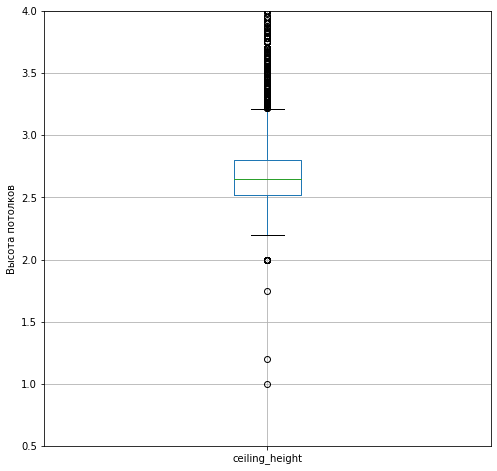

In [ ]:
df.boxplot(['ceiling_height'], figsize = (8,8))
plt.ylabel('Высота потолков')
plt.ylim(0.5, 4)

In [ ]:
# <применим функцию, на высоту>
section_ceiling = section_query(df, 'ceiling_height')
print(section_ceiling['ceiling_height'].describe())

count   13664.00
mean        2.68
std         0.18
min         2.20
25%         2.50
50%         2.64
75%         2.76
max         3.21
Name: ceiling_height, dtype: float64


In [ ]:
print(section_ceiling['ceiling_height'].value_counts())

2.50    3515
2.60    1645
2.70    1572
3.00    1109
2.80     993
        ... 
2.25       1
2.34       1
2.20       1
2.49       1
2.89       1
Name: ceiling_height, Length: 81, dtype: int64


In [ ]:
print(section_ceiling['ceiling_height'].median())

2.64


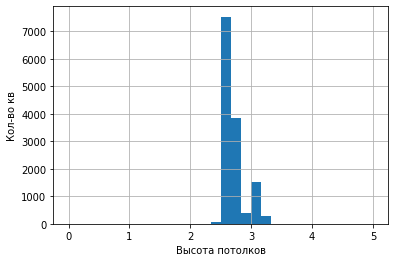

In [ ]:
section_ceiling['ceiling_height'].plot(kind = 'hist',bins = 30, range = (0,5), grid =True)
plt.xlabel('Высота потолков')
plt.ylabel('Кол-во кв')
plt.show()

<b>Заметим, что пик в районе 2.50</b>

(2, 3.5)

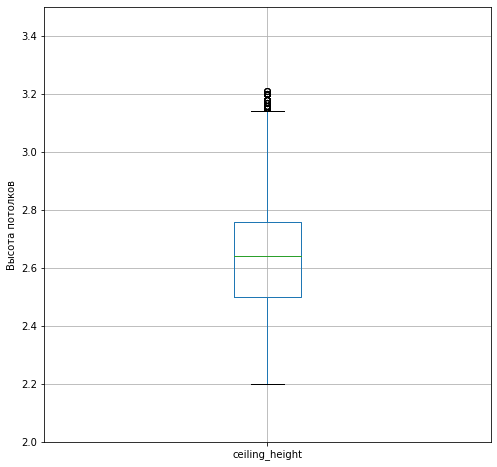

In [ ]:
section_ceiling.boxplot(['ceiling_height'], figsize = (8,8))
plt.ylabel('Высота потолков')
plt.ylim(2, 3.5)

### Вывод:
1. Изучили площадь, цену, число комнат, высоту потолков. Построили гистограммы и диаграммы размаха. 
2. Увидели большое количетсво редких и выбивающихся значений(выбросов). В виду этого гистограммы приобретали не очень информативный характер.
3. Используя срезы, избавились от выбросов и построили гистограммы и диаграммы. Увидели, что значения пришли в нормальный вид.

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? 

In [ ]:
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,number_ponds_around_3km,ponds_nearest,days_exposition,price_per_meter,weekday_public,month_public,year_public,define_floor,living_ratio_total,kitchen_ratio_total
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.00,nan,120370.37,Thursday,March,2019,другой,0.47,0.23
1,7,3350000.00,40.40,2018-12-04,1,nan,11,18.60,1,False,...,0,nan,81.00,82920.79,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2,nan,5,34.30,4,False,...,2,574.00,558.00,92785.71,Thursday,August,2015,другой,0.61,0.15
3,0,64900000.00,159.00,2015-07-24,3,nan,14,nan,9,False,...,3,234.00,424.00,408176.10,Friday,July,2015,другой,nan,nan
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.00,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381.00,nan,72490.85,Tuesday,March,2017,другой,0.55,0.10
23695,14,3100000.00,59.00,2018-01-15,3,nan,5,38.00,4,False,...,0,nan,45.00,52542.37,Monday,January,2018,другой,0.64,0.14
23696,18,2500000.00,56.70,2018-02-11,2,nan,3,29.70,1,False,...,0,nan,nan,44091.71,Sunday,February,2018,первый,0.52,nan
23697,13,11475000.00,76.75,2017-03-28,2,3.00,17,nan,12,False,...,3,196.00,602.00,149511.40,Tuesday,March,2017,другой,nan,0.30


In [ ]:
df['days_exposition'].describe()

count   20470.00
mean      180.75
std       219.78
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

In [ ]:
print(df['days_exposition'].value_counts().head(15))

45.00    879
60.00    538
7.00     234
30.00    208
90.00    203
4.00     174
3.00     158
5.00     152
14.00    148
9.00     142
20.00    139
8.00     139
44.00    138
11.00    135
18.00    129
Name: days_exposition, dtype: int64


In [ ]:
print(df['days_exposition'].value_counts().tail(15))

1434.00    1
1090.00    1
1183.00    1
1355.00    1
1028.00    1
1182.00    1
996.00     1
1255.00    1
1441.00    1
1135.00    1
1110.00    1
1049.00    1
951.00     1
693.00     1
773.00     1
Name: days_exposition, dtype: int64


***Максимальное время продажи больше 4 лет, либо просто забыли снять публикацию. Обычно в системах стоит автомат на снятие публикации через пару месяцев. Возможно у пользователя стояло автообновление публикации. А возможно реально так и продавалась.***

In [ ]:
print(df['days_exposition'].median())

95.0


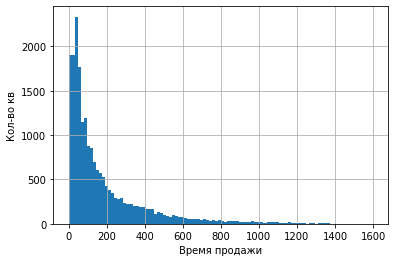

In [ ]:
df['days_exposition'].plot(kind = 'hist',bins = 100, range = (0, 1600), grid =True)
plt.xlabel('Время продажи')
plt.ylabel('Кол-во кв')
plt.show()

1. <b>Наблюдаем,что гистограмма с длинным хвостом на высоких значениях(возможно немало выбросов), которые влияют на среднее. Встречаются падения в ноль, не доходя до нулевого значения.
2. Узнаем характерный разброс, построим диаграмму размаха.
3. Построим гистограмму и диаграму размаха без выбросов.</b>

(-100, 1600)

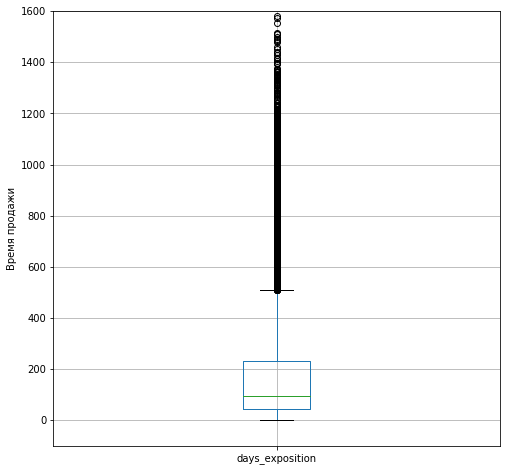

In [ ]:
df.boxplot(['days_exposition'], figsize = (8,8))
plt.ylabel('Время продажи')
plt.ylim(-100, 1600)

### Вывод
1. Делая выводы по гистограммам, видим какое количество квартир продается спустя 1.5 - 2 месяца. В целом, продажа до 3 месяцев можно считать очень быстрой.
2. Очень долгой продажей можно считать продажу свыше 6 месяцев.

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

<b>Изучим, зависит ли цена от площади, числа комнат, удалённости от центра.</b>

In [ ]:
df[['last_price','living_area','rooms','city_center_nearest']].corr()

,last_price,living_area,rooms,city_center_nearest
last_price,1.00,0.57,0.36,-0.21
living_area,0.57,1.00,0.85,-0.23
rooms,0.36,0.85,1.00,-0.18
city_center_nearest,-0.21,-0.23,-0.18,1.00


1. Корреляция между ценой и площадью квартиры <b>0,57</b> говорит о наличии связи, однако это средний показатель. Выходит, увеличение площади сопровождается прибавкой в цене, но так бывает не всегда. Видимо из выбранных параметров она влияет больше всего на цену.
2. Корреляция между ценой и количеством комнат <b>0,36</b> говорит о наличии связи, однако очень слабой. Выходит, увеличение числа комнат сопровождается прибавкой в цене, но так бывает не всегда.
3. Корреляция между ценой и удалённости от центра <b>-0,21</b>, отрицательная, говорит о наличии связи, однако очень слабой. Выходит, увеличение удаленности от центра сопровождается уменьшением в цене, но так бывает не всегда.

<b>Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.</b>

In [ ]:
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,number_ponds_around_3km,ponds_nearest,days_exposition,price_per_meter,weekday_public,month_public,year_public,define_floor,living_ratio_total,kitchen_ratio_total
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.00,nan,120370.37,Thursday,March,2019,другой,0.47,0.23
1,7,3350000.00,40.40,2018-12-04,1,nan,11,18.60,1,False,...,0,nan,81.00,82920.79,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2,nan,5,34.30,4,False,...,2,574.00,558.00,92785.71,Thursday,August,2015,другой,0.61,0.15
3,0,64900000.00,159.00,2015-07-24,3,nan,14,nan,9,False,...,3,234.00,424.00,408176.10,Friday,July,2015,другой,nan,nan
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.00,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381.00,nan,72490.85,Tuesday,March,2017,другой,0.55,0.10
23695,14,3100000.00,59.00,2018-01-15,3,nan,5,38.00,4,False,...,0,nan,45.00,52542.37,Monday,January,2018,другой,0.64,0.14
23696,18,2500000.00,56.70,2018-02-11,2,nan,3,29.70,1,False,...,0,nan,nan,44091.71,Sunday,February,2018,первый,0.52,nan
23697,13,11475000.00,76.75,2017-03-28,2,3.00,17,nan,12,False,...,3,196.00,602.00,149511.40,Tuesday,March,2017,другой,nan,0.30


In [ ]:
# <применим функцию среза от выбросов>
df = section_query(df, 'last_price')
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,number_ponds_around_3km,ponds_nearest,days_exposition,price_per_meter,weekday_public,month_public,year_public,define_floor,living_ratio_total,kitchen_ratio_total
1,7,3350000.00,40.40,2018-12-04,1,nan,11,18.60,1,False,...,0,nan,81.00,82920.79,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2,nan,5,34.30,4,False,...,2,574.00,558.00,92785.71,Thursday,August,2015,другой,0.61,0.15
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.00,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41
5,10,2890000.00,30.40,2018-09-10,1,nan,12,14.40,5,False,...,0,nan,55.00,95065.79,Monday,September,2018,другой,0.47,0.30
6,6,3700000.00,37.30,2017-11-02,1,nan,26,10.60,6,False,...,0,nan,155.00,99195.71,Thursday,November,2017,другой,0.28,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381.00,nan,72490.85,Tuesday,March,2017,другой,0.55,0.10
23695,14,3100000.00,59.00,2018-01-15,3,nan,5,38.00,4,False,...,0,nan,45.00,52542.37,Monday,January,2018,другой,0.64,0.14
23696,18,2500000.00,56.70,2018-02-11,2,nan,3,29.70,1,False,...,0,nan,nan,44091.71,Sunday,February,2018,первый,0.52,nan
23697,13,11475000.00,76.75,2017-03-28,2,3.00,17,nan,12,False,...,3,196.00,602.00,149511.40,Tuesday,March,2017,другой,nan,0.30


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(-1000000, 30000000)

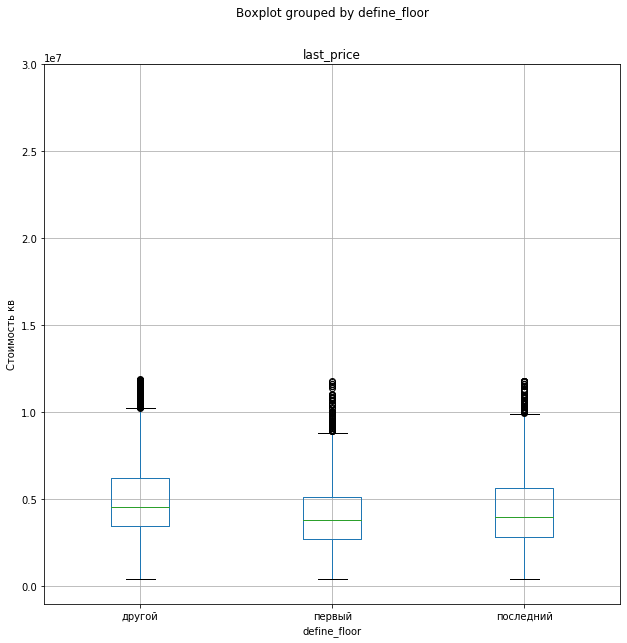

In [ ]:
# <построим диаграмму размаха цена квартиры от расположения>
df.boxplot('last_price', by='define_floor',figsize=(10,10))
plt.ylabel('Стоимость кв')
plt.ylim(-1000000,30000000)

<b>Заметим, что на первом этаже цена ниже. И на последнем тоже, по сравнению с другими.</b>

<b>Зависимость от даты размещения: дня недели, месяца и года.</b>

In [ ]:
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,number_ponds_around_3km,ponds_nearest,days_exposition,price_per_meter,weekday_public,month_public,year_public,define_floor,living_ratio_total,kitchen_ratio_total
1,7,3350000.00,40.40,2018-12-04,1,nan,11,18.60,1,False,...,0,nan,81.00,82920.79,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2,nan,5,34.30,4,False,...,2,574.00,558.00,92785.71,Thursday,August,2015,другой,0.61,0.15
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.00,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41
5,10,2890000.00,30.40,2018-09-10,1,nan,12,14.40,5,False,...,0,nan,55.00,95065.79,Monday,September,2018,другой,0.47,0.30
6,6,3700000.00,37.30,2017-11-02,1,nan,26,10.60,6,False,...,0,nan,155.00,99195.71,Thursday,November,2017,другой,0.28,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381.00,nan,72490.85,Tuesday,March,2017,другой,0.55,0.10
23695,14,3100000.00,59.00,2018-01-15,3,nan,5,38.00,4,False,...,0,nan,45.00,52542.37,Monday,January,2018,другой,0.64,0.14
23696,18,2500000.00,56.70,2018-02-11,2,nan,3,29.70,1,False,...,0,nan,nan,44091.71,Sunday,February,2018,первый,0.52,nan
23697,13,11475000.00,76.75,2017-03-28,2,3.00,17,nan,12,False,...,3,196.00,602.00,149511.40,Tuesday,March,2017,другой,nan,0.30


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(-10000000, 20000000)

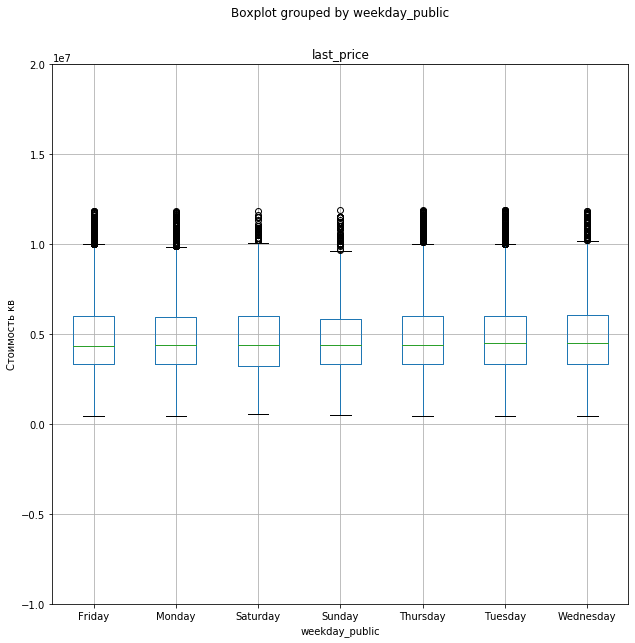

In [ ]:
# <построим диаграмму размаха цена квартиры от дня недели>
df.boxplot('last_price', by='weekday_public',figsize=(10,10))
plt.ylabel('Стоимость кв')
plt.ylim(-10000000,20000000)

<b>В целом цена не зависит от дня недели.</b>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(-100, 12000000)

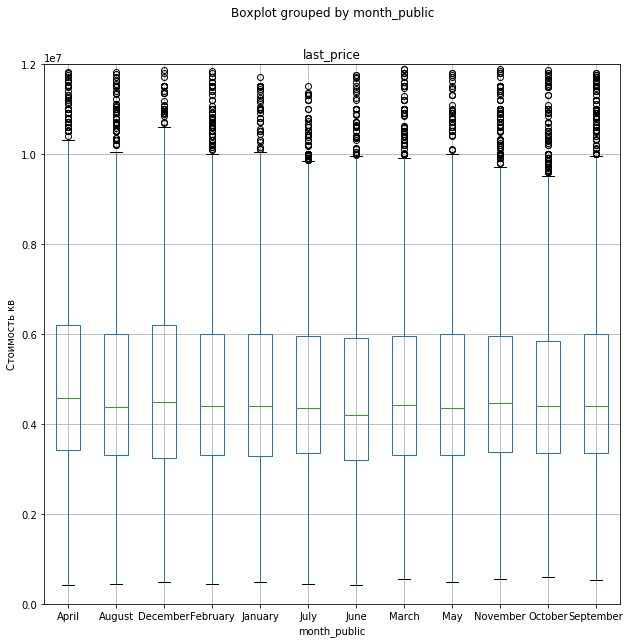

In [ ]:
# <построим диаграмму размаха цена квартиры от месяца>
df.boxplot('last_price', by='month_public',figsize=(10,10))
plt.ylabel('Стоимость кв')
plt.ylim(-100,12000000)

<b>В целом цена слабо зависит от месяца, но стоит заметить, что цена немного снижается в летние месяцы. В этот период скорее всего спрос ниже, так как люди тратят деньги на отпуска.</b>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(-100, 20000000)

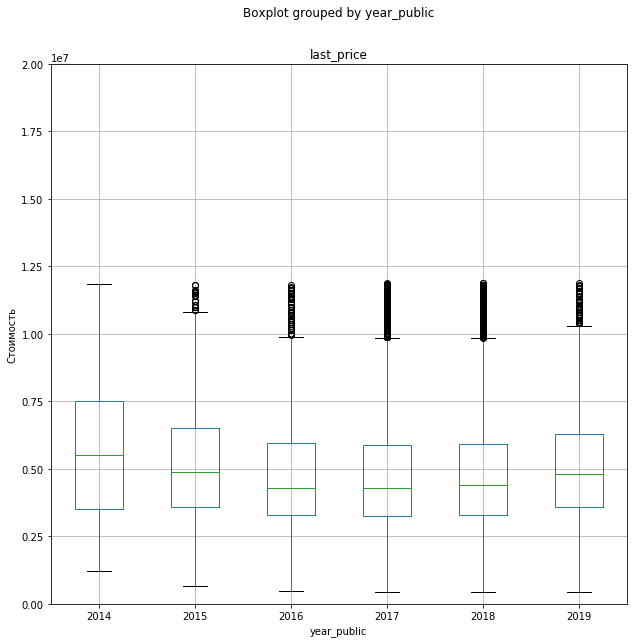

In [ ]:
# <построим диаграмму размаха цена квартиры от года>
df.boxplot('last_price', by='year_public',figsize=(10,10))
plt.ylabel('Стоимость')
plt.ylim(-100,20000000)

<b>Заметим насколько цена была высокой в 2014, возможно это было связано с санкциями, что вызвало подорожание многих комплектующих, а затем и рост цен на квартиры. В дальнейшем цена выровнилась и в 2019 немного возросла, возможно, из-за нового закона об строительстве.</b>

### Вывод
1. Проверили зависимости цены от площади, числа комнат, удалённости от центра. Выяснили, что зависимости слабые. Более сильная зависимость в отличие от других параметров, цены от площади.
2. Также провели исследование зависимости цены от того, на каком этаже расположена квартира. Выяснили, что на первом и последнем этаже ниже, чем на остальных. На первом так дешевле всего.
3. Провели исследование зависимости цены от даты размещения: дня недели, месяца и года. Выяснили, что от дня недели цена практически не меняется(зависимости фактически нет). Также выяснили, что в летние месяцы цена ниже, чем в остальные.(связано скорее всего с отпусками и денег меньше у людей). Интересную зависимость можно наблюдать цены от года размещения, объясняется это тем, какие внешние факторы влияют на рынок недвижимости.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [ ]:
print(df['locality_name'].value_counts().head(10))

Санкт-Петербург      13737
Мурино                 590
Кудрово                470
поселок Шушары         440
Всеволожск             397
Пушкин                 338
Колпино                336
поселок Парголово      327
Гатчина                305
Выборг                 236
Name: locality_name, dtype: int64


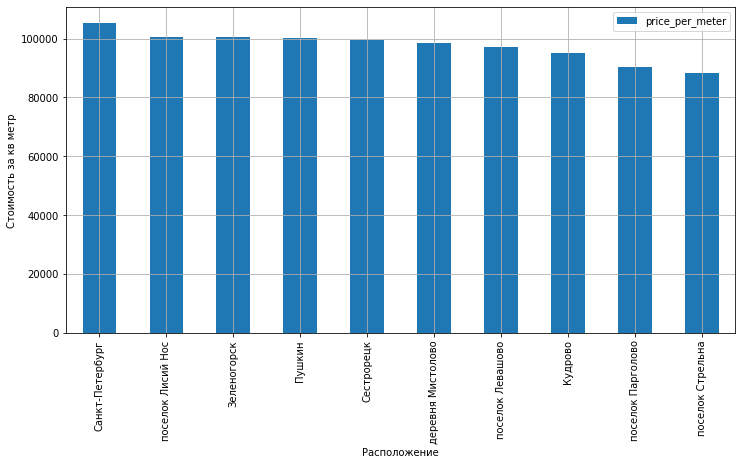

In [ ]:
df_pivot = df.pivot_table(index = ['locality_name'], values = 'price_per_meter', aggfunc = 'mean').sort_values(by = 'price_per_meter', ascending = False).head(10)
df_pivot.plot(kind = 'bar', grid = True, figsize = (12,6))
plt.xlabel('Расположение')
plt.ylabel('Стоимость за кв метр')
plt.show()

In [ ]:
df.pivot_table(index = ['locality_name'], values = 'price_per_meter', aggfunc = 'mean').sort_values(by = 'price_per_meter', ascending = False).head(10)

,price_per_meter
locality_name,
Санкт-Петербург,105426.08
поселок Лисий Нос,100660.81
Зеленогорск,100636.52
Пушкин,100290.60
Сестрорецк,99449.95
деревня Мистолово,98549.98
поселок Левашово,96997.69
Кудрово,95152.07
поселок Парголово,90175.91


In [ ]:
df.pivot_table(index = ['locality_name'], values = 'price_per_meter', aggfunc = 'median').sort_values(by = 'price_per_meter', ascending = False).head(10)

,price_per_meter
locality_name,
Санкт-Петербург,101865.14
Зеленогорск,98596.11
Сестрорецк,98341.23
Пушкин,98325.89
поселок Левашово,96997.69
Кудрово,95555.31
поселок Парголово,91642.86
деревня Мистолово,90888.89
поселок Стрельна,87741.94


In [ ]:
print(df_pivot)

                   price_per_meter
locality_name                     
Санкт-Петербург          105426.08
поселок Лисий Нос        100660.81
Зеленогорск              100636.52
Пушкин                   100290.60
Сестрорецк                99449.95
деревня Мистолово         98549.98
поселок Левашово          96997.69
Кудрово                   95152.07
поселок Парголово         90175.91
поселок Стрельна          88363.08


### Вывод
Видим, что самое дорогое жилье, как и ожидалось, в городе Санкт-Петербург. Также замечаем, что очень высокие ценны за кв.метр в Курортном районе(поселок Лисий Нос, Сестрорецк, Зеленогорск), что также оправдано. Самое дешевое жилье в основном в новых районах, где идет новое интенсивное строительство(Парголово, Кудрово). В поселке Стрельна самый низкий показатель за кв.метр из топ 10. Насколько известно, там нет интенсивной застройки, в основном дома старого фонда, а также  довольно далеко расположен от города.


### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.


In [ ]:
print(df['city_center_nearest'])

1       18603.00
2       13933.00
4        8098.00
5            nan
6       19143.00
          ...   
23694    4232.00
23695        nan
23696        nan
23697   10364.00
23698        nan
Name: city_center_nearest, Length: 21595, dtype: float64


In [ ]:
# <переведем в километры и округлим>
df['city_center_nearest_km'] = (df['city_center_nearest'] / 1000).round()

In [ ]:
print(df['city_center_nearest_km'])

1       19.00
2       14.00
4        8.00
5         nan
6       19.00
         ... 
23694    4.00
23695     nan
23696     nan
23697   10.00
23698     nan
Name: city_center_nearest_km, Length: 21595, dtype: float64


In [ ]:
# <удалим пустые значения> 
city_center_locality = df.dropna(subset=['city_center_nearest_km'])

In [ ]:
city_center_locality['city_center_nearest_km'].describe()

count   16112.00
mean       14.98
std         8.57
min         0.00
25%        11.00
50%        14.00
75%        17.00
max        66.00
Name: city_center_nearest_km, dtype: float64

In [ ]:
# <сделаем срез, выделяя квартиры из Санкт-Петербурга> 
city_center_locality = city_center_locality.query('locality_name == "Санкт-Петербург"')

In [ ]:
display(city_center_locality)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday_public,month_public,year_public,define_floor,living_ratio_total,kitchen_ratio_total,city_center_nearest_km
2,10,5196000.00,56.00,2015-08-20,2,nan,5,34.30,4,False,...,574.00,558.00,92785.71,Thursday,August,2015,другой,0.61,0.15,14.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48.00,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41,8.00
7,5,7915000.00,71.60,2019-04-18,2,nan,24,nan,22,False,...,nan,nan,110544.69,Thursday,April,2019,другой,nan,0.26,12.00
9,18,5400000.00,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,nan,289.00,88524.59,Sunday,February,2017,другой,0.71,0.11,15.00
10,5,5050000.00,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,553.00,137.00,127525.25,Thursday,November,2017,другой,0.51,0.21,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.00,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,652.00,29.00,100566.57,Wednesday,February,2018,другой,0.46,0.26,16.00
23690,3,5500000.00,52.00,2018-07-19,2,nan,5,31.00,2,False,...,nan,15.00,105769.23,Thursday,July,2018,другой,0.60,0.12,6.00
23691,11,9470000.00,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,806.00,519.00,129903.98,Thursday,October,2016,другой,0.55,0.15,4.00
23694,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,381.00,nan,72490.85,Tuesday,March,2017,другой,0.55,0.10,4.00


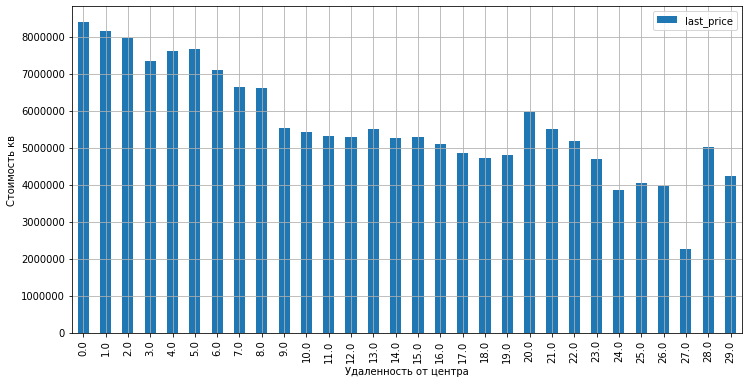

In [ ]:
city_center_pivot = city_center_locality.pivot_table(index = ['city_center_nearest_km'], values = 'last_price', aggfunc = 'mean')
city_center_pivot.plot(kind = 'bar', grid = True, figsize = (12,6))
plt.xlabel('Удаленность от центра')
plt.ylabel('Стоимость кв')
plt.show()

 ### Вывод
 Заметим, что центр города Санкт - Петербург скорее всего находится в радиусе 8 км. После 8 км цена значительно ниже, встречаются небольшие всплески, но это скорее больше связано с тем, в каком районе находится квартира. 

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу? 

In [ ]:
# <возьмем, что центр находится в пределах 8 км >
city_center_locality = city_center_locality.query('city_center_nearest_km <= 8')

In [ ]:
display(city_center_locality)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday_public,month_public,year_public,define_floor,living_ratio_total,kitchen_ratio_total,city_center_nearest_km
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48.00,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41,8.00
24,8,6500000.00,97.20,2015-10-31,2,nan,3,46.50,1,False,...,124.00,265.00,66872.43,Saturday,October,2015,первый,0.48,0.20,2.00
52,20,11795000.00,136.00,2017-09-22,6,3.00,2,94.00,2,False,...,nan,nan,86727.94,Friday,September,2017,последний,0.69,0.08,7.00
61,18,7990000.00,74.00,2017-08-24,2,nan,4,43.00,4,False,...,nan,609.00,107972.97,Thursday,August,2017,последний,0.58,0.27,4.00
70,9,3400000.00,30.00,2018-09-05,1,nan,5,16.00,1,False,...,nan,14.00,113333.33,Wednesday,September,2018,первый,0.53,0.23,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.00,47.00,2016-05-20,1,nan,6,18.20,1,False,...,519.00,131.00,90425.53,Friday,May,2016,первый,0.39,0.31,5.00
23681,13,5250000.00,43.00,2018-05-11,2,2.50,5,29.00,2,False,...,660.00,80.00,122093.02,Friday,May,2018,другой,0.67,0.14,7.00
23690,3,5500000.00,52.00,2018-07-19,2,nan,5,31.00,2,False,...,nan,15.00,105769.23,Thursday,July,2018,другой,0.60,0.12,6.00
23691,11,9470000.00,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,806.00,519.00,129903.98,Thursday,October,2016,другой,0.55,0.15,4.00


In [ ]:
city_center_locality[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,2763.00,2763.00,2763.00,1767.00
mean,65.55,7298976.29,2.30,3.04
std,23.79,2213906.20,1.02,1.20
min,12.00,1600000.00,0.00,2.40
25%,47.00,5650000.00,2.00,2.75
50%,62.90,7200000.00,2.00,3.00
75%,80.00,8990000.00,3.00,3.20
max,190.00,11894400.00,6.00,32.00


Не совсем понятное максимальное значение высоты потолков. 

<b>Изучим площадь квартир</b>

In [ ]:
city_center_locality['total_area'].value_counts()

60.00     48
70.00     36
43.00     35
72.00     35
50.00     34
          ..
133.81     1
46.83      1
59.40      1
92.30      1
96.50      1
Name: total_area, Length: 786, dtype: int64

In [ ]:
# <рассчитаем медиану>
city_center_locality['total_area'].median()

62.9

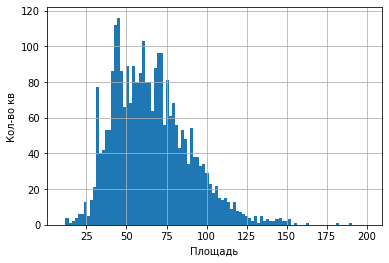

In [ ]:
city_center_locality['total_area'].plot(kind = 'hist',bins = 100, range = (10, 200), grid =True)
plt.xlabel('Площадь')
plt.ylabel('Кол-во кв')
plt.show()

<b> Наблюдается небольшое число выбросов<b>

(10, 200)

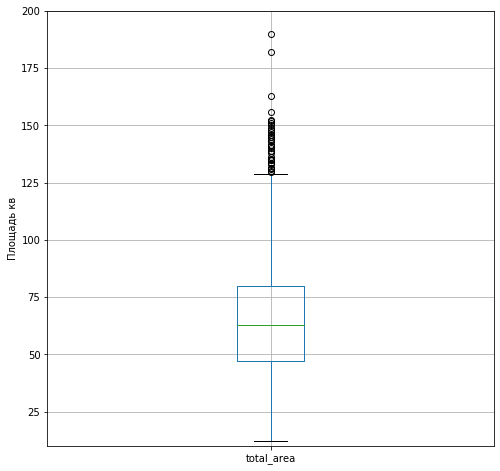

In [ ]:
city_center_locality.boxplot(['total_area'], figsize = (8,8))
plt.ylabel('Площадь кв')
plt.ylim(10, 200)

<b> Заметим, что большая часть лежит до 130.</b>

In [ ]:
section_area_locality = section_query(city_center_locality, 'total_area')
print(section_area_locality['total_area'].describe())

count   2725.00
mean      64.46
std       22.02
min       12.00
25%       46.80
50%       62.00
75%       79.00
max      129.00
Name: total_area, dtype: float64


In [ ]:
print(section_area_locality['total_area'].value_counts())

60.00     48
70.00     36
72.00     35
43.00     35
50.00     34
          ..
79.40      1
40.60      1
49.35      1
52.40      1
110.60     1
Name: total_area, Length: 753, dtype: int64


In [ ]:
print(section_area_locality['total_area'].median())

62.0


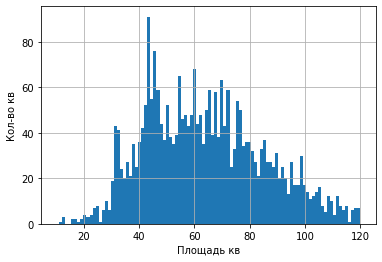

In [ ]:
section_area_locality['total_area'].plot(kind = 'hist',bins = 100, range = (10, 120), grid =True)
plt.xlabel('Площадь кв')
plt.ylabel('Кол-во кв')
plt.show()

(0, 130)

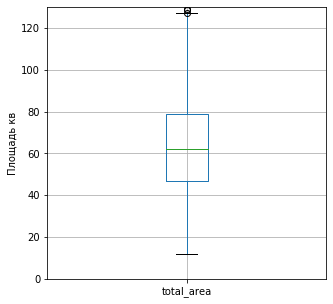

In [ ]:
section_area_locality.boxplot(['total_area'], figsize = (5,5))
plt.ylabel('Площадь кв')
plt.ylim(0, 130)

<b>Изучим цену квартир</b>

In [ ]:
city_center_locality['last_price'].value_counts()

8500000.00     57
7500000.00     53
6500000.00     50
8000000.00     46
10500000.00    38
               ..
10197200.00     1
8690000.00      1
8280000.00      1
5099000.00      1
8585256.00      1
Name: last_price, Length: 721, dtype: int64

In [ ]:
# <рассчитаем медиану>
city_center_locality['last_price'].median()

7200000.0

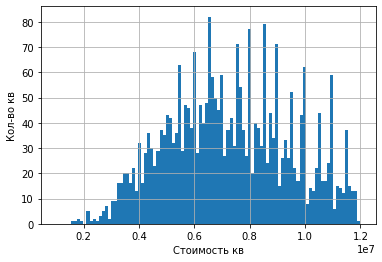

In [ ]:
city_center_locality['last_price'].plot(kind = 'hist',bins = 100, range = (1000000, 12000000), grid =True)
plt.xlabel('Стоимость кв')
plt.ylabel('Кол-во кв')
plt.show()

(100000, 12000000)

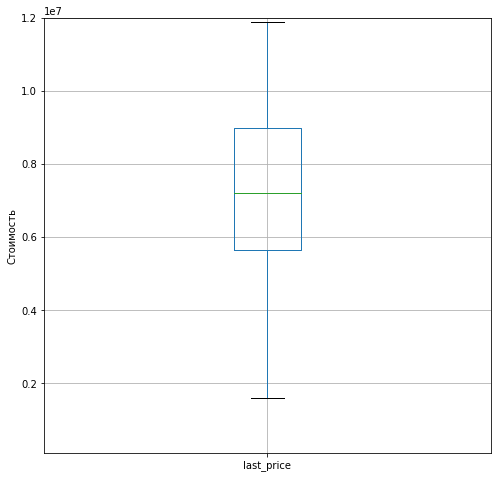

In [ ]:
city_center_locality.boxplot(['last_price'], figsize = (8,8))
plt.ylabel('Стоимость')
plt.ylim(100000, 12000000)

<b> Не  наблюдаем выбросов, все цены в пределах нормы.</b>

<b>Изучим число комнат</b>

In [ ]:
city_center_locality['rooms'].value_counts()

2    1028
3     783
1     618
4     245
5      59
0      21
6       9
Name: rooms, dtype: int64

In [ ]:
print(city_center_locality['rooms'].median())

2.0


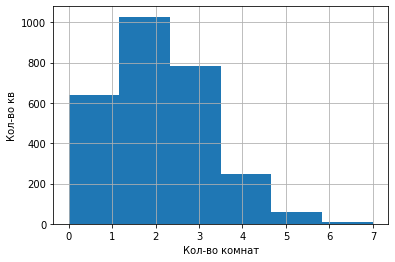

In [ ]:
city_center_locality['rooms'].plot(kind = 'hist',bins =6, range = (0,7), grid =True)
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во кв')
plt.show()

<b>Преобладает количество 2-х и 3-х комнатных</b>

(-2, 7)

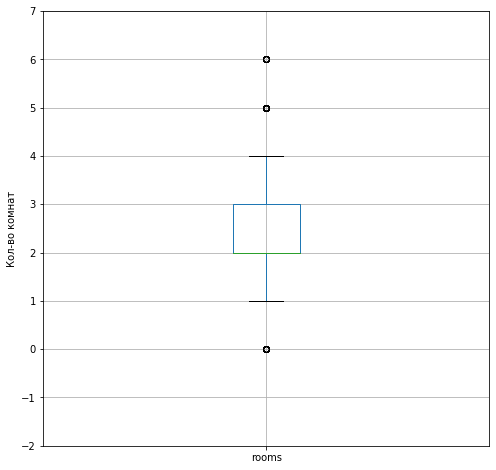

In [ ]:
city_center_locality.boxplot(['rooms'], figsize = (8,8))
plt.ylabel('Кол-во комнат')
plt.ylim(-2, 7)

In [ ]:
section_rooms_locality = section_query(city_center_locality, 'rooms')
print(section_rooms_locality['rooms'].describe())

count   2674.00
mean       2.24
std        0.91
min        1.00
25%        2.00
50%        2.00
75%        3.00
max        4.00
Name: rooms, dtype: float64


In [ ]:
print(section_rooms_locality['rooms'].value_counts())

2    1028
3     783
1     618
4     245
Name: rooms, dtype: int64


In [ ]:
print(section_rooms_locality['rooms'].median())

2.0


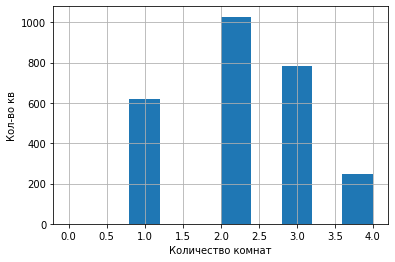

In [ ]:
section_rooms_locality['rooms'].plot(kind = 'hist',bins = 10, range = (0,4), grid =True)
plt.xlabel('Количество комнат')
plt.ylabel('Кол-во кв')
plt.show()

(0, 4.5)

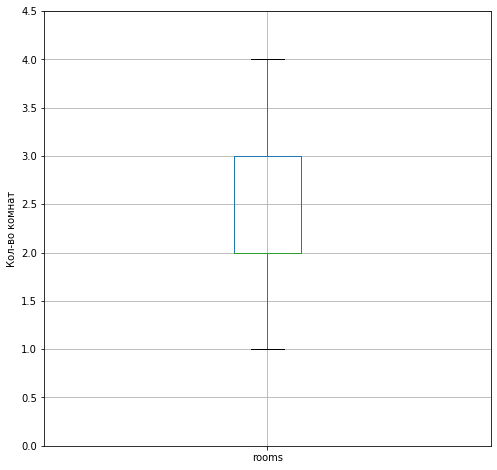

In [ ]:
section_rooms_locality.boxplot(['rooms'], figsize = (8,8))
plt.ylabel('Кол-во комнат')
plt.ylim(0, 4.5)

<b>Изучим высоту потолков</b>

In [ ]:
print(city_center_locality['ceiling_height'].value_counts())

3.00    307
2.50    152
3.20    129
2.70    126
2.80    115
       ... 
5.80      1
4.37      1
2.49      1
4.30      1
2.47      1
Name: ceiling_height, Length: 132, dtype: int64


In [ ]:
print(city_center_locality['ceiling_height'].median())

3.0


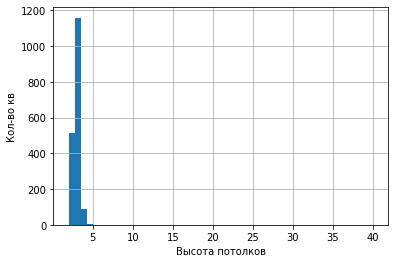

In [ ]:
city_center_locality['ceiling_height'].plot(kind = 'hist',bins = 50, range = (2, 40), grid =True)
plt.xlabel('Высота потолков')
plt.ylabel('Кол-во кв')
plt.show()

(0, 32)

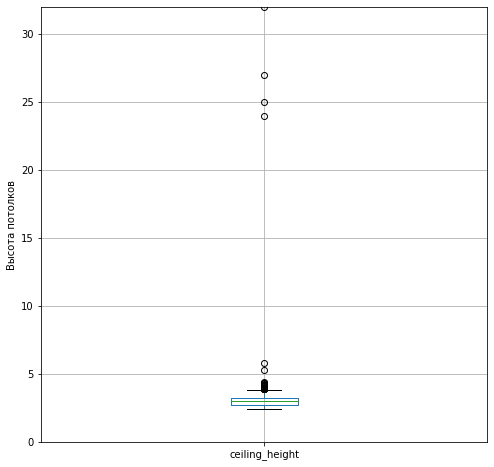

In [ ]:
city_center_locality.boxplot(['ceiling_height'], figsize = (8,8))
plt.ylabel('Высота потолков')
plt.ylim(0, 32)

In [ ]:
section_ceiling_height_locality = section_query(city_center_locality, 'ceiling_height')
print(section_ceiling_height_locality['ceiling_height'].describe())

count   1729.00
mean       2.96
std        0.30
min        2.40
25%        2.72
50%        3.00
75%        3.20
max        3.85
Name: ceiling_height, dtype: float64


In [ ]:
print(section_ceiling_height_locality['ceiling_height'].value_counts())

3.00    307
2.50    152
3.20    129
2.70    126
2.80    115
       ... 
2.49      1
3.65      1
2.86      1
3.48      1
2.40      1
Name: ceiling_height, Length: 111, dtype: int64


In [ ]:
print(section_ceiling_height_locality['ceiling_height'].median())

3.0


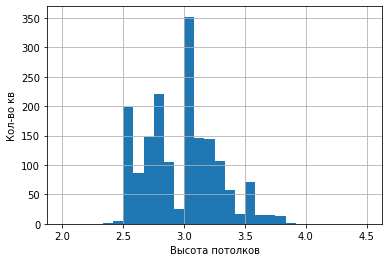

In [ ]:
section_ceiling_height_locality['ceiling_height'].plot(kind = 'hist',bins = 30, range = (2,4.5), grid =True)
plt.xlabel('Высота потолков')
plt.ylabel('Кол-во кв')
plt.show()

<b>Много квартир с высотой потолков в 3 метра</b>

(2, 4.5)

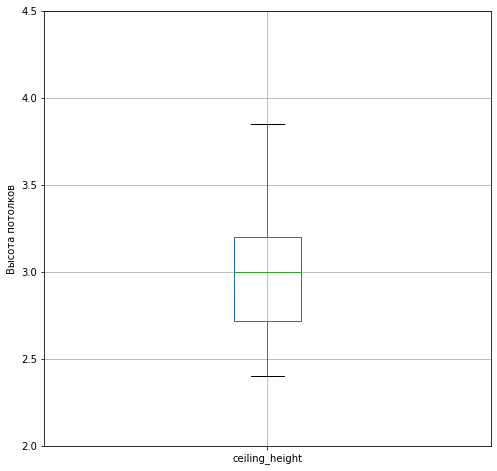

In [ ]:
section_ceiling_height_locality.boxplot(['ceiling_height'], figsize = (8,8))
plt.ylabel('Высота потолков')
plt.ylim(2, 4.5)

### Вывод
1. Изучили площадь, цену, число комнат, высоту потолков в квартирах которые находятся в центре. Построили гистограммы и диаграммы размаха. 
2. Увидели редкие и выбивающиеся значения(выбросы). В виду этого гистограммы приобретали не очень информативный характер.
3. Используя срезы, избавились от выбросов и построили гистограммы и диаграммы. Увидели, что значения пришли в нормальный вид.

<b>Изучим, зависит ли стоимость квартиры от числа комнат, удалённости от центра.</b>

In [ ]:
corrMatrix = city_center_locality[['last_price','rooms','city_center_nearest']].corr()

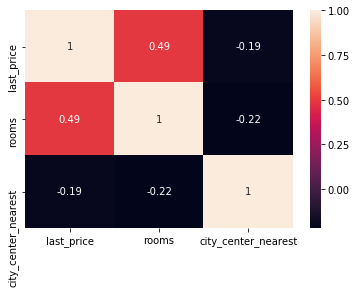

In [ ]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

1. Корреляция между ценой и количеством комнат <b>0,49</b> говорит о наличии связи, однако очень слабой. Выходит, увеличение числа комнат сопровождается прибавкой в цене, но так бывает не всегда.
2. Корреляция между ценой и удалённости от центра <b>-0,19</b>, отрицательная, говорит о наличии связи, однако очень слабой. Выходит, увеличение удаленности от центра сопровождается уменьшением в цене, но так бывает не всегда.

<b>Изучим зависимость стоимости от того, на каком этаже расположена квартира: первом, последнем или другом.</b>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(-1000000, 15000000)

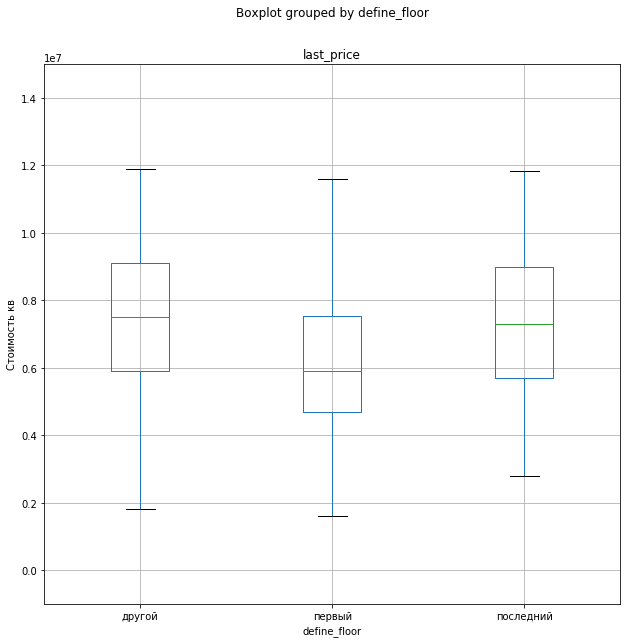

In [ ]:
# <построим диаграмму размаха цена квартиры от расположения>
city_center_locality.boxplot('last_price', by='define_floor',figsize=(10,10))
plt.ylabel('Стоимость кв')
plt.ylim(-1000000,15000000)

<b>Заметим, что на первом этаже цена ниже. На последнем практически такая же как и на других этажах.</b>

<b>Зависимость от даты размещения: дня недели, месяца и года.</b>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1000000, 20000000)

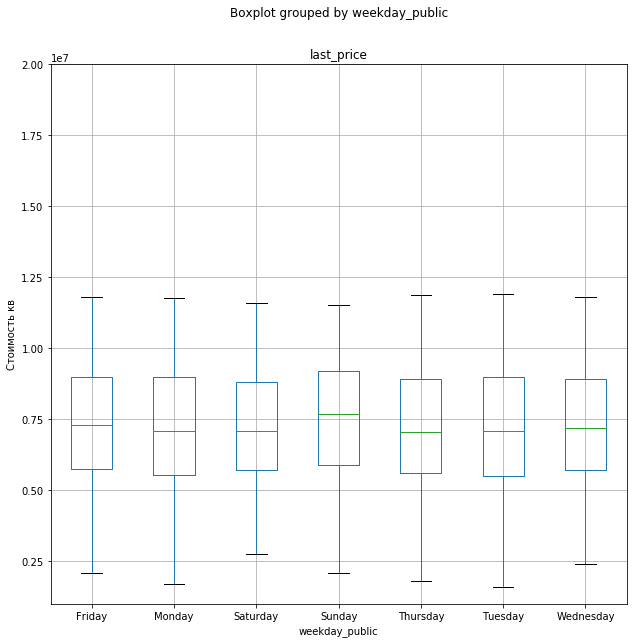

In [ ]:
# <построим диаграмму размаха цена квартиры от дня недели>
city_center_locality.boxplot('last_price', by='weekday_public',figsize=(10,10))
plt.ylabel('Стоимость кв')
plt.ylim(1000000,20000000)

<b>Чуть заметно, что стоимость в воскресенье и пятницу повышается</b>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(-100, 12000000)

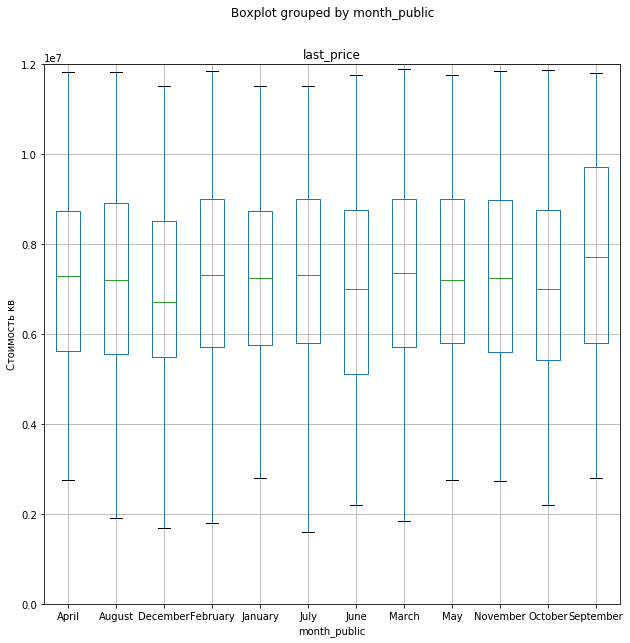

In [ ]:
# <построим диаграмму размаха цена квартиры от месяца>
city_center_locality.boxplot('last_price', by='month_public',figsize=(10,10))
plt.ylabel('Стоимость кв')
plt.ylim(-100,12000000)

<b>Заметим, что стоимость в декабре и октябре падает, в сентябре стоимость повышается, в остальные дни более менее ровно.</b>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(-100, 20000000)

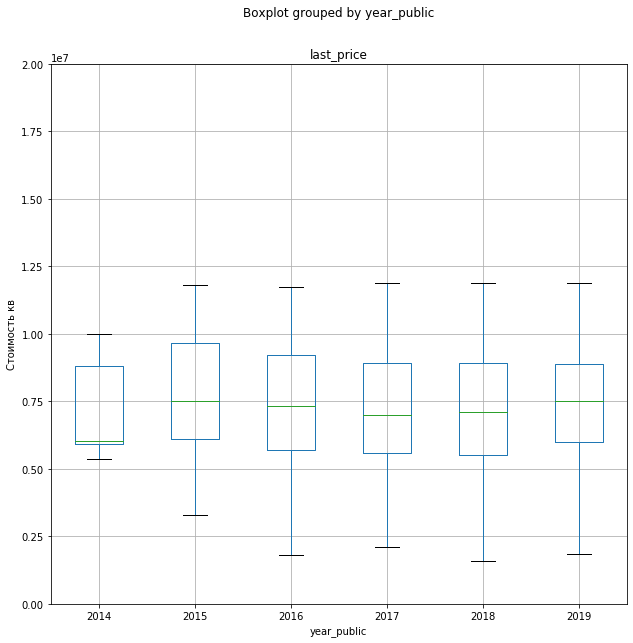

In [ ]:
# <построим диаграмму размаха цена квартиры от года>
city_center_locality.boxplot('last_price', by='year_public',figsize=(10,10))
plt.ylabel('Стоимость кв')
plt.ylim(-100,20000000)

<b>Интересно, что в 2014 стоимость ниже остальных годов.</b>

## Шаг 5. Общий вывод

1. Стоит заметить, что зависимость между стоимостью на квартиры и удаленностью от центра одинакова, как для сегмента квартир в центре, так и для всего города, что не сажешь о зависимости стоимости от количества комнат, для сегмента квартир в центре данный показатель чуть выше.
2. Зависимость от расположения на этаже в обоих случаях зависимость примерно одинаковая(первый этаж дешевле по сравнению с другими).
3. Зависимость от дня недели, если оценивать по всему городу, то зависимости практически нет. В случае с сегментом квартирв центре, то чуть заметно, что в воскресенье и пятницу стоимость выше по сравнению с остальными днями.
4. Зависимость от месяца, если оценивать по всему городу, то в целом цена слабо зависит от месяца, но стоит заметить, что цена немного снижается в летние месяцы. В этот период скорее всего спрос ниже, так как люди тратят деньги на отпуска. В случае с сегментом, стоимость в декабре и октябре падает, в сентябре стоимость повышается, в остальные дни более менее ровно.
5. Зависимость от года, если оценивать по всему городу, то цена была высокой в 2014, возможно это было связано с санкциями, что вызвало подорожание многих комплектующих, а затем и рост цен на квартиры. В дальнейшем цена выровнилась и в 2019 немного возросла, возможно, из-за нового закона об строительстве. Если оценивать сегмент, то в 2014 наоборот стоимость ниже, чем последующие годы.
6. Возможно, если было бы больше данных для оценки сегмента квартир в центре, то показатели были другими.
7. Также стоит отметить качество данных: необходимо проверить систему подачи объявлений как пользователями, так и самой системой(необходимо производить проверку и валидацию полей, поменять типы некоторых полей. Все это необходимо, чтобы избежать дубликаты, а также пропуски).

## Рекомендации 
- Уделить большое внимание валидации полей, чтобы больше не сталкиваться с проблемой отсутствующих значений.
- При указывании адреса или отметки на карте(сделать это обязательным действием) сделать автоматический расчет до парков, водоемов, аэропортов.
- Расстояние считать в километрах и целых числах.
- Предупреждать пользователей о возможных некорректных значениях, а также сделать именно выбор значений в некоторых полях, а не заполнять самим(Например: список, где расположена квартира), чтобы избежать дубликатов.
- Контролировать время публикации, по истечении например 30 дней, снимать публикацию автоматически, чтобы пользователь сам продлевал публикацию или подключил автопродление.
- Можно добавить фильтр (первый этаж, последний этаж, другие этажи), может ускорить поиск более дешевых квартир.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод